#**DITYA ILMI RIZQI**

IMAGE CLASSIFICATION USING ANN, SOURCE CODENYA BOLEH SAMA KAYAK YG CONTOH
INGET YA ANN BUKAN CNN

KAN INI DATANYA DALAM BENTUK FOLDER, SEDANGKAN KALO DI CONTOH UDH DALAM BENTUK ARRAY, JADI UBAH DULU DATASET YG DI FOLDER KE ARRAY DULU, JADI NANTI ADA DATA X DAN Y

> X => CITRANYA/ IMAGE

> Y => LABELNYA 







In [ ]:
# download catS and dogS dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-01-01 11:52:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 173.194.213.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   236MB/s    in 0.3s    

2022-01-01 11:52:17 (236 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# unzip dataset
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# dataset terdiri dari train dan validation
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(test_cats_dir)))
print('total validation dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
train_type = os.listdir(train_dir) 
print(train_type)
print("Type of train dataset : ", len(train_type))

['cats', 'dogs']
Type of train dataset :  2


In [ ]:
test = os.listdir(test_dir) 
print(test)
print("Type of train dataset : ", len(test))

['cats', 'dogs']
Type of train dataset :  2


In [ ]:
trains = []

for item in train_type:
  all_trains = os.listdir(train_dir + '/' +item)

  for pet in all_trains:
    trains.append((item, str(train_dir + '/' +item) + '/' + pet))
    print(trains[:1])

[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_dogs_filtered/train/cats/cat.240.jpg')]
[('cats', '/tmp/cats_and_

In [ ]:
# Build dataframe
trains_df = pd.DataFrame(data=trains, columns=['Pet type', 'Image'])
print(trains_df.head())
print(trains_df.tail())

  Pet type                                              Image
0     cats  /tmp/cats_and_dogs_filtered/train/cats/cat.240...
1     cats  /tmp/cats_and_dogs_filtered/train/cats/cat.181...
2     cats  /tmp/cats_and_dogs_filtered/train/cats/cat.461...
3     cats  /tmp/cats_and_dogs_filtered/train/cats/cat.844...
4     cats  /tmp/cats_and_dogs_filtered/train/cats/cat.426...
     Pet type                                              Image
1995     dogs  /tmp/cats_and_dogs_filtered/train/dogs/dog.388...
1996     dogs  /tmp/cats_and_dogs_filtered/train/dogs/dog.939...
1997     dogs  /tmp/cats_and_dogs_filtered/train/dogs/dog.694...
1998     dogs  /tmp/cats_and_dogs_filtered/train/dogs/dog.466...
1999     dogs  /tmp/cats_and_dogs_filtered/train/dogs/dog.19.jpg


In [ ]:
# many of sample for each category
print("Total number of pets in the train :", len(trains_df))

Total number of pets in the train : 2000


In [ ]:
pet_count = trains_df['Pet type'].value_counts()

print("print each category: ")
print(pet_count)

print each category: 
cats    1000
dogs    1000
Name: Pet type, dtype: int64


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.240.jpg', 'cat.181.jpg', 'cat.461.jpg', 'cat.844.jpg', 'cat.426.jpg', 'cat.620.jpg', 'cat.403.jpg', 'cat.94.jpg', 'cat.63.jpg', 'cat.619.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
import cv2
path = train_dir + '/'

im_size = 300

images = []
labels = []

for i in train_type:
  data_path = path + str(i)
  file = [i for i in os.listdir(data_path) ] 

  for f in file:
    img = cv2.imread(data_path + '/' + f)
    img = cv2.resize(img, (im_size, im_size))
    images.append(img)
    labels.append(i)
    

In [ ]:
images = np.array(images)
images.shape

(2000, 300, 300, 3)

In [ ]:
images = images.astype('float32') / 255.0

In [ ]:
images.shape

(2000, 300, 300, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

y = trains_df['Pet type'].values
print(y[:5])

['cats' 'cats' 'cats' 'cats' 'cats']


In [ ]:
# for y
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)

[0 0 0 ... 1 1 1]


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, y = shuffle(images, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.05, random_state=415)

print("shape of x_train:", train_x.shape)
print("shape of y_train:", train_y.shape)
print("shape of x_test:", test_x.shape)
print("shape of y_test:", test_y.shape)

shape of x_train: (1900, 300, 300, 3)
shape of y_train: (1900,)
shape of x_test: (100, 300, 300, 3)
shape of y_test: (100,)


In [ ]:
train_y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
train_y = train_y.reshape(-1,)
train_y.shape
train_y

array([0, 0, 0, ..., 1, 0, 0])

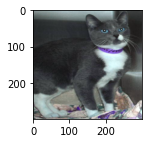

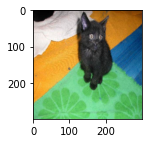

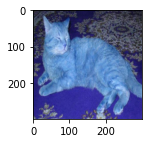

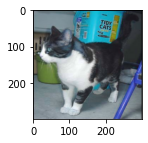

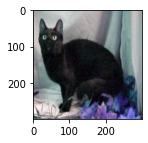

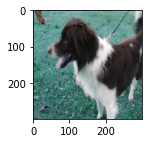

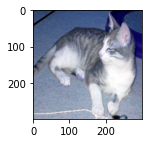

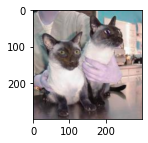

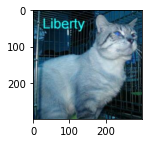

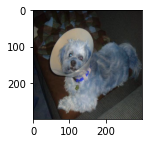

In [ ]:
train_y[:5]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])

for i in range(10):
  plot_sample(train_x, train_y, i)

# **ARTIFICIAL NEURAL NETWORK**

In [ ]:
import keras
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(300, 300,3)),
    tf.keras.layers.Dense(256, activation= 'relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs=10)

Epoch 1/10
60/60 [==============================] - 35s 572ms/step - loss: 70.2797 - accuracy: 0.5274
Epoch 2/10
60/60 [==============================] - 28s 473ms/step - loss: 42.4388 - accuracy: 0.5484
Epoch 3/10
60/60 [==============================] - 27s 455ms/step - loss: 20.4575 - accuracy: 0.5600
Epoch 4/10
60/60 [==============================] - 28s 460ms/step - loss: 19.4644 - accuracy: 0.5747
Epoch 5/10
60/60 [==============================] - 27s 455ms/step - loss: 11.0867 - accuracy: 0.6295
Epoch 6/10
60/60 [==============================] - 27s 455ms/step - loss: 19.1909 - accuracy: 0.5879
Epoch 7/10
60/60 [==============================] - 28s 465ms/step - loss: 23.1863 - accuracy: 0.5784
Epoch 8/10
60/60 [==============================] - 27s 456ms/step - loss: 8.2093 - accuracy: 0.6632
Epoch 9/10
60/60 [==============================] - 27s 454ms/step - loss: 6.8994 - accuracy: 0.6653
Epoch 10/10
60/60 [==============================] - 27s 457ms/step - loss: 11.8999 

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = model.predict(test_x)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_y, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        50
           1       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Classification Report: \n", confusion_matrix(test_y, y_pred_classes))

Classification Report: 
 [[50  0]
 [50  0]]


Saving cat.8.jpg to cat.8.jpg
cat.8.jpg
cat


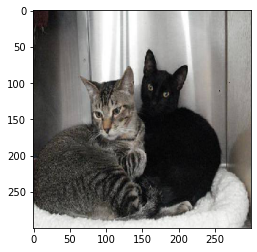

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size=(300,300,3))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(fn)
  if classes[0][0] == 1:
    print('cat')
  elif classes[0][1] == 1:
    print('dog')
  else : 
    print('Tidak Diketahui')

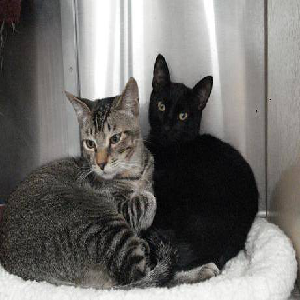

In [ ]:
from keras.preprocessing.image import load_img

import numpy as np

image = load_img('cat.8.jpg', target_size=(300, 300))
image

In [ ]:
image = np.array(image)
image.shape

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [ ]:
yhat = model.predict(image)
yhat

array([[1., 1., 0.]], dtype=float32)